<a href="https://colab.research.google.com/github/hyj765/AI-study/blob/main/functional_Model_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test , _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
print(x_train.shape[2])

28


In [5]:
vector_size =128

In [6]:
class Autoencoder(Model):
  def __init__(self, latent_vector,dataset_size):
    super(Autoencoder , self).__init__()
    self.data_hsize = dataset_size[1]
    self.data_wsize = dataset_size[2]
    self.data_size = self.data_hsize * self.data_wsize
    self.vector_size = latent_vector
    self.encoder = Sequential()
    self.encoder.add(Flatten())
    self.encoder.add(Dense(self.vector_size,activation='relu'))
    self.decoder = Sequential()
    self.decoder.add(Dense(self.data_size,activation = 'relu'))
    self.decoder.add(Reshape((self.data_hsize,self.data_wsize)))

  def call(self, input):
    encoder_v = self.encoder(input)
    decoder_v = self.decoder(encoder_v)
    return decoder_v
    

In [7]:
autoencoder = Autoencoder(vector_size,x_train.shape)
autoencoder.compile(optimizer='adam',loss=MeanSquaredError())

In [8]:
autoencoder.fit(x_train,x_train,
                epochs=10,
                shuffle = True,
                validation_data = (x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0132 - val_loss: 0.0085
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.007

In [12]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [13]:
def autoencoder_visualize(n):
  plt.figure(figsize=(20,4))
  for i in range(n):
    result = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.title('original')
    plt.gray()
    result.get_xaxis().set_visible(False)
    result.get_yaxis().set_visible(False)

    result = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title('result')
    plt.gray()
    result.get_xaxis().set_visible(False)
    result.get_yaxis().set_visible(False)
  plt.show()

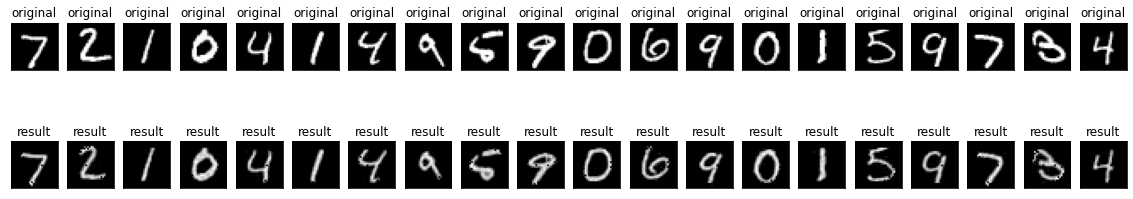

In [14]:
autoencoder_visualize(20)